# Μέλη της Ομάδας

**Σκουρτσίδης Γεώργιος (03114307)**

***Βονδικάκης Ιωάννης (031131860)***


# Ερώτημα 1 (50%)
Στο ερώτημα αυτό θα χρησιμοποιήσετε αλγορίθμους εύρεσης ακμών, για να παράξετε ένα **cartoonified** αποτέλεσμα της εικόνας εισόδου. Το σκεπτικό είναι να εκμεταλευθείτε τις φυσικές ακμές της εικόνας για να δημιουργήσετε "περιγράμματα".

In [0]:
#-------------------------------------------------------------------------------#
#                Εισαγωγή απαραίτητων imports εδώ                               #        
#-------------------------------------------------------------------------------#
from matplotlib import pyplot as plt
from skimage.morphology import disk
from skimage import filters
from scipy import signal
import matplotlib.pylab as pylab
import numpy as np
import cv2 

##1. Δημιουργία εικόνας των μελών της ομάδας

   Να δημιουργήσετε **μια εικόνα με τα πρόσωπα των μελών της ομάδας σας**. Μπορείτε να αποκτήσετε την εικόνα κάθε μέλους με όποιον τρόπο θέλετε, αρκεί να είναι όσο πιο καθαρή γίνεται, σε όσο το δυνατόν καλύτερες συνθήκες φωτισμού. Οι διαστάσεις των ατομικών εικόνων προτείνουμε να είναι **512x288**.
  
- **Για ομάδες 2 ατόμων:** Να φορτώσετε και να ενώσετε, με τη χρήση κώδικα python, τις εικόνες των επι μέρους μελών σε μια τελική εικόνα  (**512x576**.)

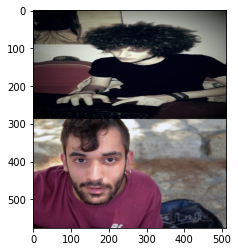

In [701]:
#-------------------------------------------------------------------------------#
#    First we have to upload manually "giorgos.jpg" and "giannis.jpg"           #
#              Then we read the images using skimage.io                         #        
#-------------------------------------------------------------------------------#
img1 = cv2.imread('giannis.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('giorgos.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

#-------------------------------------------------------------------------------#
#     We create a new image by merging the 2 images vertically                  #        
#-------------------------------------------------------------------------------#
img3 = np.concatenate((img1, img2), axis=0)


#-------------------------------------------------------------------------------#
#                             Show image                                        #        
#-------------------------------------------------------------------------------#
plt.imshow(img3)


##2. Επιλογή χρωματικού χώρου

Να επιλέξετε τον κατάλληλο χρωματικό χώρο για την εικόνα εισόδου σας.

In [0]:
#-------------------------------------------------------------#
#              Convert Image to grayscale                     #        
#-------------------------------------------------------------#
rgb_img = img3
img3 = color.rgb2gray(img3)


 ## 3. Εφαρμογή θορύβου  

 
  Να εφαρμόσετε θόρυβο στην εικόνα, χρησιμοποιώντας τη μέθοδο `random_noise` του πακέτου `skimage.util` και να ακολουθήστε τα παρακάτω, μοναδικά για την κάθε ομάδα, βήματα. Στη συνέχεια να τυπώσετε το αποτέλεσμα.

*   **Gaussian** θόρυβο, με `seed` ίσο με το **τελευταίο** ψηφίο του **ΑΜ** του πρώτου (ή μοναδικού) μέλους της ομάδας.
*   **Salt and Pepper** θόρυβο με `seed` ίσο με το **τελευταίο** ψηφίο του **ΑΜ** του πρώτου (ή μοναδικού) μέλους της ομάδας και `amount` που δίνεται από τον τύπο:

  $amount(x)=\frac{1}{90}x + 0.3$

  όπου $x$ το **προτελευταίο** ψηφίο του **ΑΜ** του ίδιου μέλους. Ο παραπάνω τύπος θα πρέπει να υλοποιηθεί σε ξεχωριστή **μέθοδο** στον κώδικά σας και να καλείται όταν χρειαστεί.

In [0]:
#-------------------------------------------------------------------------------#
#                     Function to show images                                   #        
#-------------------------------------------------------------------------------#
from skimage import img_as_float

def imshow_all(*images, titles=None,text = None):
    images = [img_as_float(img) for img in images]
    if text != None:
      print(text)
    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax, cmap="gray")
        ax.set_title(label,fontsize=20)

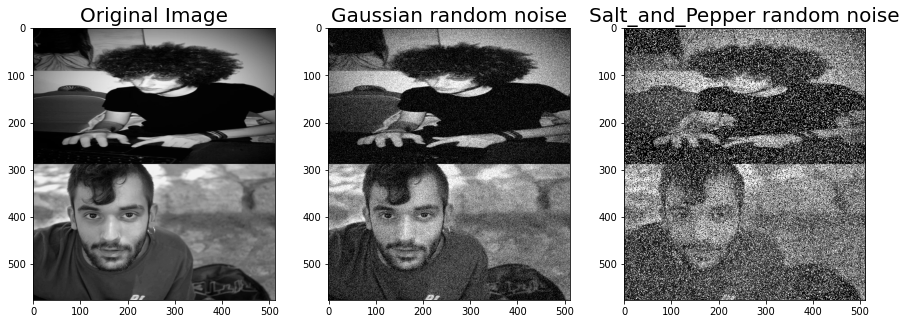

In [704]:
#-------------------------------------------------------------------------------#
#                     Apply random noise in our image                           #        
#-------------------------------------------------------------------------------#

# Gaussian noise
gaussian_noise = util.random_noise(img3, mode='gaussian', seed=7)

# Salt and Pepper noise
salt_and_pepper_noise = util.random_noise(img3, mode='s&p', seed=7, amount = 0.37777777778)


#-------------------------------------------------------------------------------#
#                           Print results                                       #
#-------------------------------------------------------------------------------#
  # show original and noisy images
imshow_all(img3,gaussian_noise,salt_and_pepper_noise, 
           titles=['Original Image','Gaussian random noise', 'Salt_and_Pepper random noise'])


##4. Φίλτρα (Mean, Median, Gaussian)

   Να εφαρμόσετε **mean**, **median** και **gaussian filtering** και στις δύο εικόνες του προηγούμενου βήματος. Μπορείτε να πειραματιστείτε με την παραμετροποίηση των φίλτρων. Να τυπώσετε το αποτέλεσμα της εφαρμογής κάθε φιλτρου (συμπεριλαμβανομένων των διάφορων πειραματισμών που θα κάνετε). Συγκρίνετε τα αποτελέσματα και εξηγήστε ποιό φίλτρο απέδωσε καλύτερα σε κάθε εικόνα και γιατί.

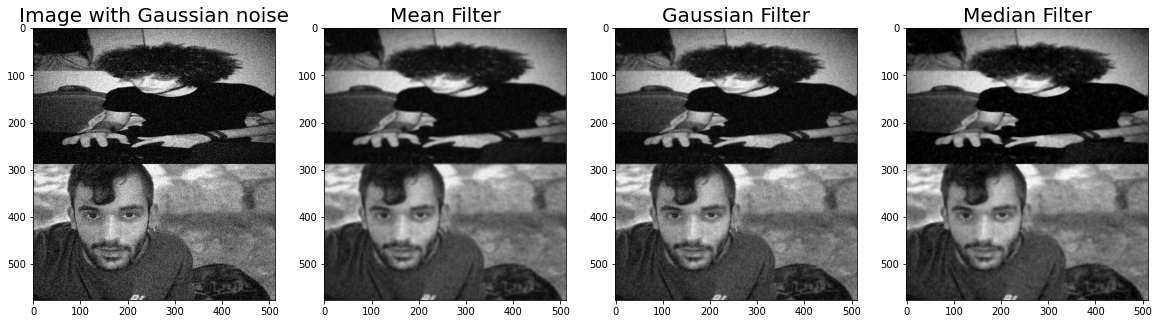

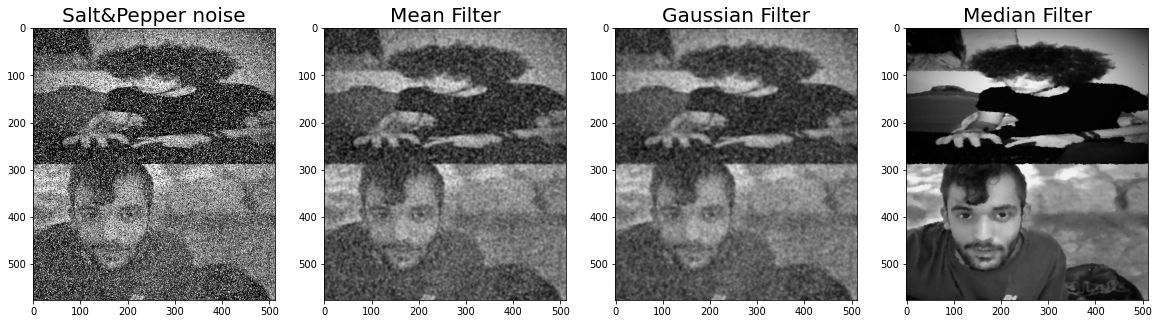

In [705]:
#-------------------------------------------------------------------------------#
#                Apply filters to image with Gaussian noise                     #        
#-------------------------------------------------------------------------------#
 # We convert float64 array/image to uint8 as required by rank filters functions used below(mean,gaussian,median).
 # If we don't make this conversion manually,python will do it automatically,so it is optional
gaussian_noise =  util.img_as_ubyte(gaussian_noise)

neighborhood = disk(3)
GaussianFilter = filters.gaussian(gaussian_noise, 1)
MeanFilter = filters.rank.mean(gaussian_noise, neighborhood)
MedianFilter = filters.rank.median(gaussian_noise, neighborhood)
imshow_all(gaussian_noise, MeanFilter, GaussianFilter, MedianFilter,
           titles=['Image with Gaussian noise', 'Mean Filter' ,'Gaussian Filter', 'Median Filter'])

 # Save the filter with the best result in a new variable
Best_For_GaussNoise = MeanFilter

#-------------------------------------------------------------------------------#
#             Apply filters to image with Salt & Pepper noise                   #        
#-------------------------------------------------------------------------------#
 # We convert float64 to uint8 (reasons explained in previous image)
salt_and_pepper_noise =  util.img_as_ubyte(salt_and_pepper_noise)

neighborhood = disk(3)
GaussianFilter = filters.gaussian(salt_and_pepper_noise, 2)
MeanFilter = filters.rank.mean(salt_and_pepper_noise, neighborhood)
MedianFilter = filters.rank.median(salt_and_pepper_noise, neighborhood)
imshow_all(salt_and_pepper_noise, MeanFilter, GaussianFilter, MedianFilter,
           titles=['Salt&Pepper noise', 'Mean Filter' ,'Gaussian Filter', 'Median Filter'])

 # Save the filter with the best result in a new variable
Best_For_SaltPepper = MedianFilter

##5. Aνιχνευτές ακμών (Laplacian, Canny,Marr-Hildreth)

   Να εφαρμόσετε τους ανιχνευτές ακμών **Laplacian**, **Canny** και **Marr-Hildreth** στα καλύτερα αποτελέσματα αποθορυβοποίησης των δύο εικόνων θορύβου του βήματος 3 (το καλύτερο αποτέλεσμα για την εικόνα gaussian θορύβου και το καλύτερο αποτέλεσμα για την εικόνα salt and pepper θορύβου). Μπορείτε να πειραματιστείτε με την παραμετροποίηση των ανιχνευτών, με στόχο το καλύτερο δυνατό αποτέλεσμα. Να τυπώσετε το αποτέλεσμα της εφαρμογής κάθε φιλτρου (συμπεριλαμβανομένων των διάφορων πειραματισμών που θα κάνετε).

### Eικόνα με γκαουσιανό θόρυβο 

#### Canny detector

Canny:

   Experiments with Sigma Value



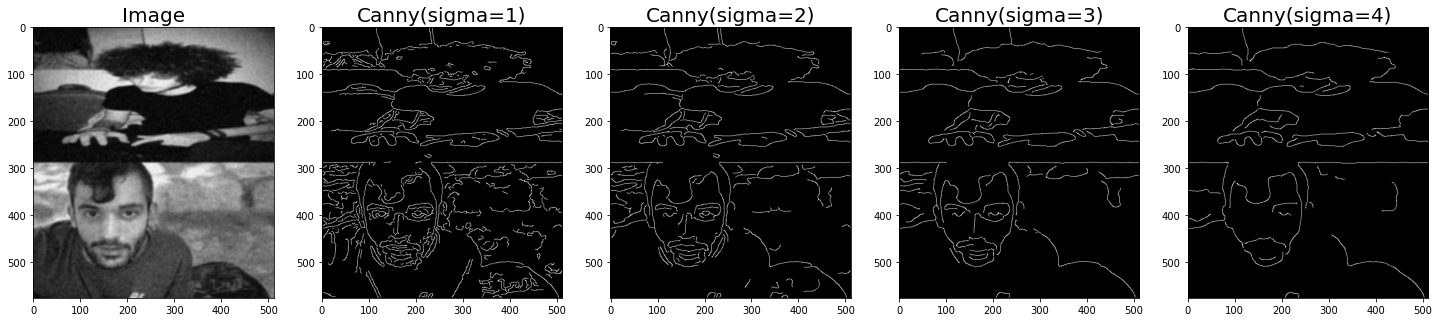

In [706]:
#####################################################################################################
                  #----------------------------------------------------------#
                  #   Ανιχνευτές ακμών για την εικόνα με Gauss Noise         #
                  #       που πέρασε από φίλτρο μέσης τιμής                  #
                  #----------------------------------------------------------#
#####################################################################################################

                              #--------------------------------#
                              #      Canny Edge Detector       # 
                              #--------------------------------#
 # Αρχικά πειραματιζόμαστε με τις τιμές της παραμέτρου
edges1 = feature.canny(Best_For_GaussNoise, sigma=1)
edges2 = feature.canny(Best_For_GaussNoise, sigma=2)
edges3 = feature.canny(Best_For_GaussNoise, sigma=3)
edges4 = feature.canny(Best_For_GaussNoise, sigma=4)

 # εμφάνιση αποτελεσμάτων
imshow_all(Best_For_GaussNoise, edges1, edges2, edges3, edges4,
           titles=['Image', 'Canny(sigma=1)', 'Canny(sigma=2)','Canny(sigma=3)', 'Canny(sigma=4)'],
           text = '\033[1m' + '\033[94m'+ 'Canny:\n\n'+'\033[0m'+'\033[1m'+'   Experiments with Sigma Value\n')

 # Aποθηκεύμε την τιμή με το καλύτερο αποτέλεσμα στην μεταβλητή 'Canny_Best1'
Canny_Best1 = edges3

#### Laplacian 

Laplacian Filter:





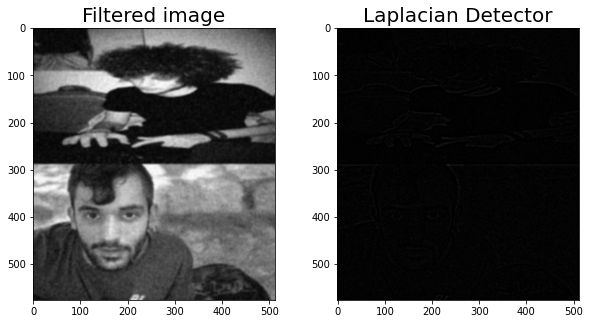

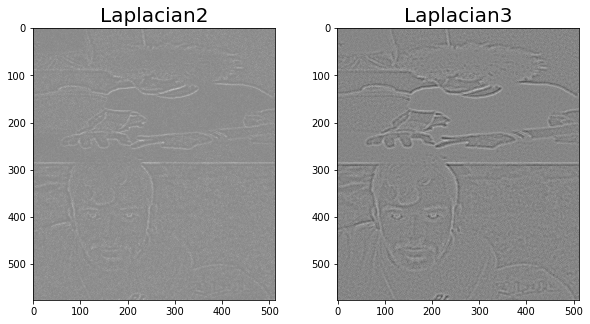

In [707]:
                              #--------------------------------#
                              #      Laplacian Detector        # 
                              #--------------------------------#
laplacian1= np.clip(filters.laplace(Best_For_GaussNoise), 0, 1)


imshow_all(Best_For_GaussNoise, laplacian1,
           titles=['Filtered image', 'Laplacian Detector'],
           text = '\033[1m' + '\033[94m'+ 'Laplacian Filter:\n\n'+'\033[0m'+'\033[1m'+'\n')
laplacian2 = np.clip(cv2.Laplacian(Best_For_GaussNoise,cv2.CV_64F),0,350)
laplacian3 = cv2.Laplacian(Best_For_GaussNoise,cv2.CV_64F)
imshow_all(laplacian2, laplacian3, titles=['Laplacian2', 'Laplacian3'])

 # Aποθηκεύμε την τιμή με το καλύτερο αποτέλεσμα στην μεταβλητή 'laplace_best1'
laplace_best1 = laplacian3

####Marr-Hildreth 

Marr-Hildreth:

   Experiments with Sigma Value



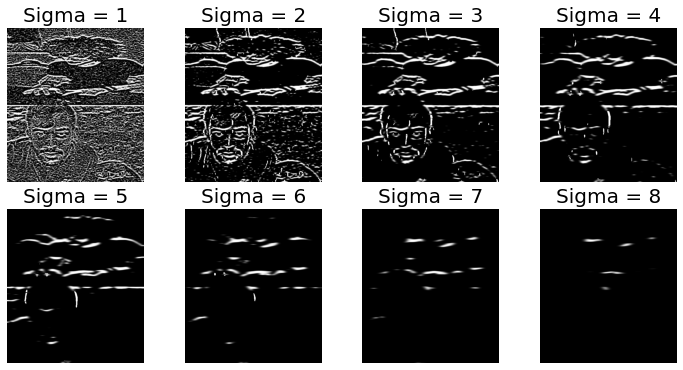

In [708]:
                              #--------------------------------#
                              #        Marr-Hildreth           # 
                              #--------------------------------#

pylab.figure(figsize=(12,20))

for sigma in list(range(1,9)):
    img_log=ndi.gaussian_laplace(Best_For_GaussNoise, sigma=sigma)  
    pylab.subplot(6,4,sigma), pylab.imshow(img_log, cmap='gray'), pylab.axis('off')
    pylab.title('Sigma = ' + str(sigma), size=20)

pylab.subplots_adjust(wspace=0.3, hspace=0)
print ('\033[1m' + '\033[94m'+ 'Marr-Hildreth:\n\n'+'\033[0m'+'\033[1m'+'   Experiments with Sigma Value\n')
pylab.show()

 # Aποθηκεύμε την τιμή με το καλύτερο αποτέλεσμα στην μεταβλητή 'Marr_Hildreth_Best1'
Marr_Hildreth_Best1 = ndi.gaussian_laplace(Best_For_GaussNoise, sigma=3)  

### Eικόνα με Salt & Pepper θόρυβο 

#### Canny detector

Canny:

   Experiments with Sigma Value



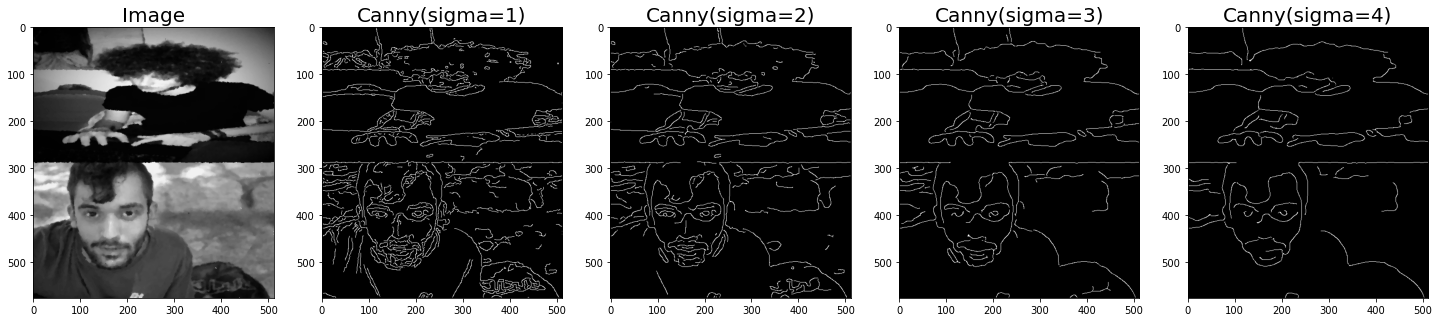

In [709]:
#####################################################################################################
                    #----------------------------------------------------------#
                    #  Ανιχνευτές ακμών για την εικόνα με Salt & Pepper noise  #
                    #         που πέρασε από median filter                     #
                    #----------------------------------------------------------#
#####################################################################################################
                              #--------------------------------#
                              #      Canny Edge Detector       # 
                              #--------------------------------#
 # Αρχικά πειραματιζόμαστε με τις τιμές της παραμέτρου
edges1 = feature.canny(Best_For_SaltPepper, sigma=1)
edges2 = feature.canny(Best_For_SaltPepper, sigma=2)
edges3 = feature.canny(Best_For_SaltPepper, sigma=3)
edges4 = feature.canny(Best_For_SaltPepper, sigma=4)

 # εμφάνιση αποτελεσμάτων
imshow_all(Best_For_SaltPepper, edges1, edges2, edges3, edges4,
           titles=['Image', 'Canny(sigma=1)', 'Canny(sigma=2)','Canny(sigma=3)', 'Canny(sigma=4)'],
           text = '\033[1m' + '\033[94m'+ 'Canny:\n\n'+'\033[0m'+'\033[1m'+'   Experiments with Sigma Value\n')

 # Aποθηκεύμε την τιμή με το καλύτερο αποτέλεσμα στην μεταβλητή 'Canny_Best2'
Canny_Best2 = edges3

#### Laplacian

Laplacian Filter:

   Experiments



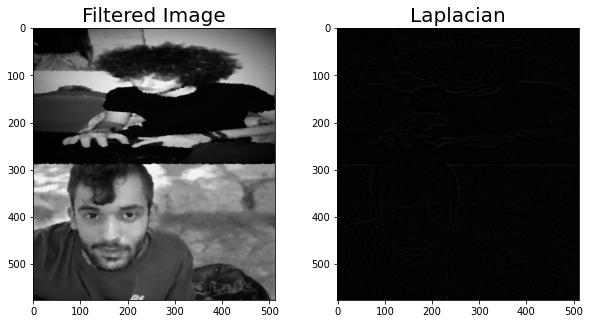

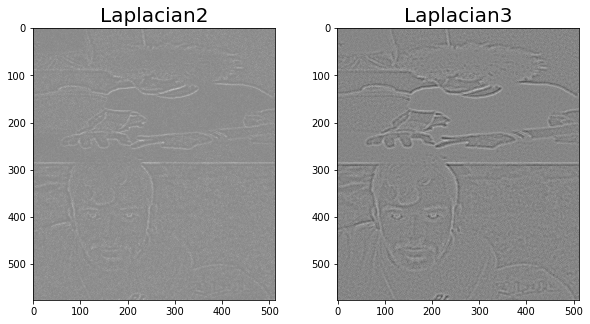

In [710]:
                              #--------------------------------#
                              #          Laplacian             # 
                              #--------------------------------#
laplacian4= np.clip(filters.laplace(Best_For_SaltPepper), 0, 1)
imshow_all(Best_For_SaltPepper, laplacian_filter1,
           titles=['Filtered Image', 'Laplacian'],
           text = '\033[1m' + '\033[94m'+ 'Laplacian Filter:\n\n'+'\033[0m'+'\033[1m'+'   Experiments\n'+'\033[0m')

laplacian5 = np.clip(cv2.Laplacian(Best_For_GaussNoise,cv2.CV_64F),0,350)
laplacian6 = cv2.Laplacian(Best_For_GaussNoise,cv2.CV_64F)
imshow_all(laplacian2, laplacian3, titles=['Laplacian2', 'Laplacian3'])

 # Aποθηκεύμε την τιμή με το καλύτερο αποτέλεσμα στην μεταβλητή 'laplace_best2'
laplace_best2 = laplacian6

####Marr-Hildreth 

Marr-Hildreth:

   Experiments with Sigma Value



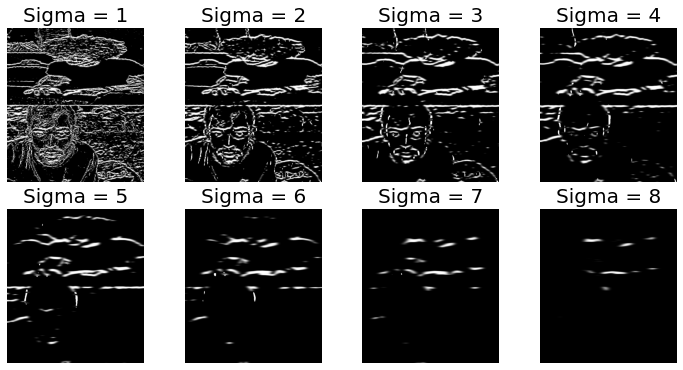

In [711]:
                              #--------------------------------#
                              #        Marr-Hildreth           # 
                              #--------------------------------#

pylab.figure(figsize=(12,20))

for sigma in list(range(1,9)):
    img_log=ndi.gaussian_laplace(Best_For_SaltPepper, sigma=sigma)  
    pylab.subplot(6,4,sigma), pylab.imshow(img_log, cmap='gray'), pylab.axis('off')
    pylab.title('Sigma = ' + str(sigma), size=20)

pylab.subplots_adjust(wspace=0.3, hspace=0)
print ('\033[1m' + '\033[94m'+ 'Marr-Hildreth:\n\n'+'\033[0m'+'\033[1m'+'   Experiments with Sigma Value\n')
pylab.show()

 # Aποθηκεύμε την τιμή με το καλύτερο αποτέλεσμα στην μεταβλητή 'Marr_Hildreth_Best2'
Marr_Hildreth_Best2 = ndi.gaussian_laplace(Best_For_SaltPepper, sigma=4)  

## Τα καλύτερα αποτελέσματα των detectors

Best Results





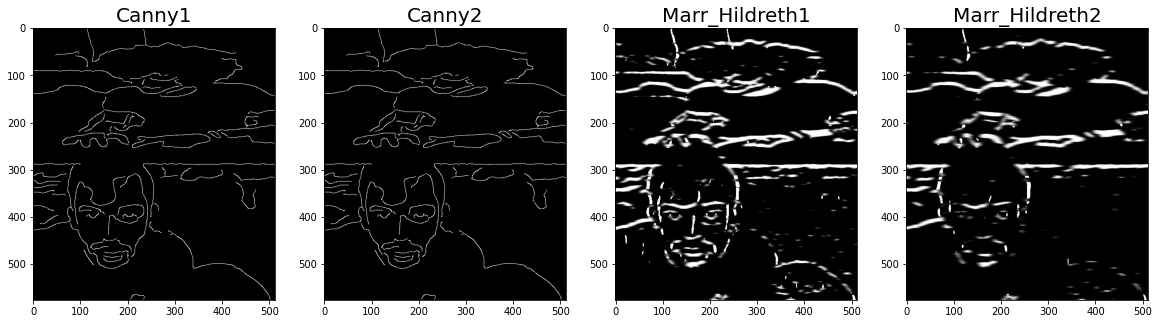

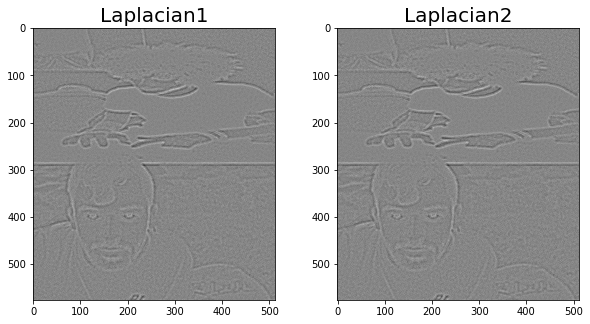

In [712]:
imshow_all(Canny_Best1,Canny_Best1,Marr_Hildreth_Best1,Marr_Hildreth_Best2,
                      titles=['Canny1','Canny2','Marr_Hildreth1','Marr_Hildreth2'],
           text = '\033[1m' + '\033[94m'+ 'Best Results\n\n'+'\033[0m'+'\033[1m''\n'+'\033[0m')
imshow_all(laplace_best1,laplace_best2,
            titles=['Laplacian1', 'Laplacian2'])

### Inverted best results

Best Results Inverted





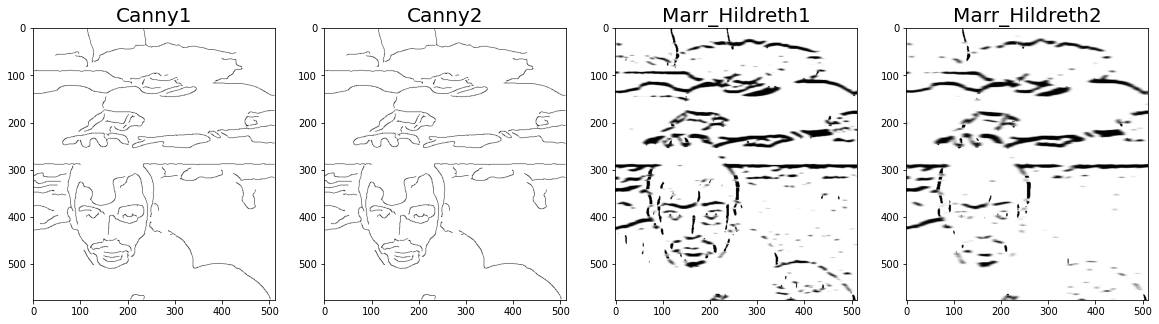

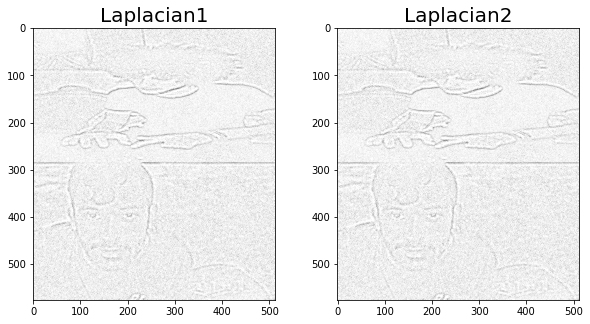

In [713]:
# Εκτυπώνουμε τα καλύτερα αποτελέσματα σε inverted(negative) μορφή για περαιτέρω σύγκρισή τους
imshow_all(util.invert(Canny_Best1),util.invert(Canny_Best1),util.invert(Marr_Hildreth_Best1),util.invert(Marr_Hildreth_Best2),
                      titles=['Canny1','Canny2','Marr_Hildreth1','Marr_Hildreth2'],
           text = '\033[1m' + '\033[94m'+ 'Best Results Inverted\n\n'+'\033[0m'+'\033[1m''\n'+'\033[0m')
imshow_all(util.invert(laplacian2),util.invert(laplacian5),
            titles=['Laplacian1', 'Laplacian2'])

##6. Cartoonified Εικόνα

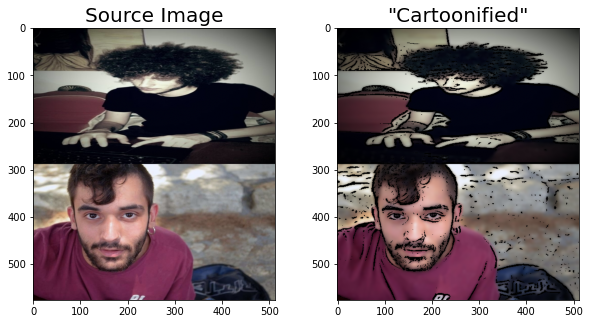

In [714]:
def cartoonify(source_img):
    # Find  Edges
    gray = cv2.cvtColor(source_img, cv2.COLOR_RGB2GRAY)
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    color = cv2.bilateralFilter(source_img, 9, 300, 300)

    # Put the edges on the image to make a Cartoon
    cartoon = cv2.bitwise_and(color, color, mask=edges)

    # Print results
    imshow_all(source_img,cartoon,
               titles = ['Source Image','"Cartoonified"'])
    

# Call the function 
cartoonify(rgb_img)